In [20]:
from classMVA import MVA
import numpy as np
import matplotlib.pyplot as plt

[[   0.     0.3    0. ]
 [   0.     0.     0. ]
 [   0.     0.     0. ]
 [   0.4    0.3    0. ]
 [   0.5    0.3  100. ]
 [   0.     0.     0. ]
 [   0.     0.     0. ]]


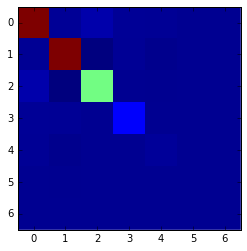

In [5]:
#X = np.random.randn(5000,10) * np.array([1,np.sqrt(0.1),1 , np.sqrt(0.5),np.sqrt(0.1),1e-4, np.sqrt(0.1), np.sqrt(0.01), 1e-4, 1e-4])
X = np.random.randn(5000,7) * np.array([1, 1, np.sqrt(0.5), np.sqrt(0.1), np.sqrt(0.01), 1e-4, 1e-4])

#Regression coefficients
R = np.array([[0, 0.3, 0],[0, 0, 0],[0, 0, 0], [0.4, 0.3, 0], [0.5, 0.3, 100], [0, 0, 0], [0, 0, 0]])

print R

Y = X.dot(R) + np.sqrt(1e-3)*np.random.randn(5000,3)

plt.imshow(X.T.dot(X), interpolation='none')
plt.show()

[[ 1.   0.   0.   0.3  0.   0.   0. ]
 [ 0.   1.   0.   0.   0.   0.   0. ]
 [ 0.   0.   1.   0.   0.   0.8  0. ]
 [ 0.   0.   0.   1.   0.   0.   0. ]
 [ 0.   0.   0.   0.   1.   0.   0. ]
 [ 0.   0.   0.   0.   0.   1.   0. ]
 [ 0.   0.   0.   0.   0.   0.   1. ]]


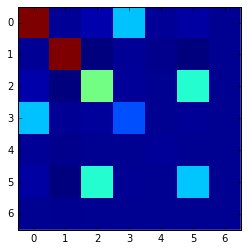

In [6]:
#Finally, we mix a little bit some coordinates:
W = np.eye(7,7)
W[0,3] = .3
W[2,5] = .8
print W
X2 = X.dot(W)
plt.imshow(X2.T.dot(X2), interpolation='none')
plt.show()

In [7]:

RDD_X = sc.parallelize(X2.tolist())
RDD_Y = sc.parallelize(Y.tolist())

RDD_labeled = RDD_Y.zip(RDD_X)

print RDD_X.count()
print RDD_Y.count()
print RDD_labeled.count()

print RDD_X.first()
print RDD_Y.first()
print RDD_labeled.first()


5000
5000
5000
[0.045698875841509085, -0.2749214092649969, -0.7400993307625362, -0.1067881766069237, -0.12066845488618275, -0.5920943072514083, -9.540219213437216e-06]
[-0.12785929935094426, -0.07962630125749777, -12.021538198873998]
([-0.12785929935094426, -0.07962630125749777, -12.021538198873998], [0.045698875841509085, -0.2749214092649969, -0.7400993307625362, -0.1067881766069237, -0.12066845488618275, -0.5920943072514083, -9.540219213437216e-06])


In [6]:
RDD_new=prueba.predict(RDD_PCA)

NameError: name 'prueba' is not defined

In [24]:
#PCA example
prueba = MVA('PCA','l1','None',1e-5,7,0.0001,1e-3,100)
RDD_PCA = RDD_labeled.map(lambda x: x[1])
prueba.prepareData(RDD_PCA)
prueba.normalizer()

In [9]:
print prueba._typeMVA
print prueba._typeReg
print prueba._typeNorm
print prueba._tol
print prueba._numVariables
print prueba._M
print prueba._data.take(2)
print prueba._normdata.take(2)
print prueba._scaler
print prueba._U
print prueba._max_Ustep

PCA
l1
None
1e-05
11
11
[(DenseVector([0.9665, -0.3968, 0.3712, -0.2269, 0.5364, 0.4637, -0.0001, 0.1693, 0.0468, -0.0003, -0.0001]), DenseVector([0.9665, -0.3968, 0.3712, -0.2269, 0.5364, 0.4637, -0.0001, 0.1693, 0.0468, -0.0003, -0.0001])), (DenseVector([-0.103, 0.6867, -0.0617, 0.9475, 0.1796, -0.2456, 0.0002, 0.22, 0.1048, 0.0, -0.0]), DenseVector([-0.103, 0.6867, -0.0617, 0.9475, 0.1796, -0.2456, 0.0002, 0.22, 0.1048, 0.0, -0.0]))]
[(DenseVector([0.9845, -0.395, 0.3947, -0.2201, 0.5287, 0.4858, -0.0001, 0.1674, 0.0456, -0.0003, -0.0001]), DenseVector([0.9845, -0.395, 0.3947, -0.2201, 0.5287, 0.4858, -0.0001, 0.1674, 0.0456, -0.0003, -0.0001])), (DenseVector([-0.085, 0.6885, -0.0381, 0.9543, 0.1719, -0.2236, 0.0002, 0.2182, 0.1037, 0.0, -0.0]), DenseVector([-0.085, 0.6885, -0.0381, 0.9543, 0.1719, -0.2236, 0.0002, 0.2182, 0.1037, 0.0, -0.0]))]
None
10


In [28]:
#RDD_NEW= RDD_PCA.map(lambda x: x.dot(((self._U).T))).collect()
import time 
init=time.localtime( time.time() )
prueba.predict(RDD_PCA)
end=time.localtime( time.time() )
print init
print end

#print RDD_NEW.count()

You have to fit the model first
time.struct_time(tm_year=2017, tm_mon=6, tm_mday=15, tm_hour=21, tm_min=53, tm_sec=45, tm_wday=3, tm_yday=166, tm_isdst=1)
time.struct_time(tm_year=2017, tm_mon=6, tm_mday=15, tm_hour=21, tm_min=53, tm_sec=45, tm_wday=3, tm_yday=166, tm_isdst=1)


In [30]:
#ESCALABILIDAD
#self, typeMVA, typeReg,typeNorm, tol, regParam=0.01, step=1e-3, iterations=100, max_Ustep=10):
import time 
#print time.localtime( time.time() )
resta=0
for i in range(7):
    prueba = MVA('PCA','l1','None',1e-5,i+1,0.01,1e-3,100)
    print 'INIT TIME FOR ' + str(i) + ' component ' + str(time.localtime( time.time() ))
    prueba.fit(RDD_PCA)
    print 'END TIME FOR ' + str(i) + ' component ' + str(time.localtime( time.time() ))
    #W=prueba._W
    #U=prueba._U
    #mse=RDD_PCA.map(lambda x: np.mean(np.array(x - np.dot(W,np.dot(x, U.T)))**2)).mean()
    print 

print prueba._U

INIT TIME FOR 0 component time.struct_time(tm_year=2017, tm_mon=6, tm_mday=15, tm_hour=21, tm_min=55, tm_sec=26, tm_wday=3, tm_yday=166, tm_isdst=1)
(1, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 1
(1, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 1
Frobenius norm error: 0.000225534265065
(1, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 1
Frobenius norm error: 0.000195744200273
(1, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 1
Frobenius norm error: 0.00016692256526
(1, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 1
Frobenius norm error: 0.000140525987527
(1, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 1
Frobenius norm error: 0.000117153126426
(1, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 1
Frobenius norm error: 9.69480422268e-05
(1, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 1
Frobenius norm error: 7.83040354239e-05
(1, 7)
(7, 7)
(7, 7)
Extracting projection vector 0 out of 1
Frobenius norm error: 6

In [36]:
#ESCALABILIDAD
from sklearn import preprocessing
from sklearn import decomposition 
for i in range(6):
    pca = decomposition.PCA(n_components=i+1)
    print 'INIT TIME FOR ' + str(i) + ' component ' + str(time())
    pca.fit(RDD_PCA.collect())
    print 'END TIME FOR ' + str(i) + ' component ' + str(time())
    #W=prueba._W
    #U=prueba._U
    #mse=RDD_PCA.map(lambda x: np.mean(np.array(x - np.dot(W,np.dot(x, U.T)))**2)).mean()

TypeError: 'module' object is not callable

In [ ]:
from sklearn import preprocessing

plt.imshow(np.abs(preprocessing.normalize(prueba._U, norm='l2')), interpolation='none')
plt.show()


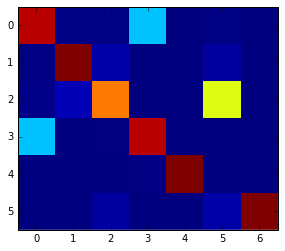

In [34]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=6)
pca.fit(RDD_PCA.collect())
plt.imshow(np.abs(pca.components_), interpolation='none')
plt.show()

In [ ]:
prueba = MVA('PCA','l1','None',1e-5,7,0.0001,1e-2,100)
prueba.fit(RDD_PCA)

In [ ]:

plt.imshow(np.abs(preprocessing.normalize(prueba._U, norm='l2')), interpolation='none')
plt.show()

In [ ]:
prueba = MVA('PCA','l1','None',1e-5,7,0.01,1e-2,100)
prueba.fit(RDD_PCA)

In [ ]:
plt.imshow(np.abs(preprocessing.normalize(prueba._U, norm='l2')), interpolation='none')
plt.show()

In [ ]:
plt.plot(np.abs(preprocessing.normalize(prueba._U, norm='l2')).T)
plt.show()

In [ ]:
plt.plot(abs(pca.components_.T))
plt.show()

In [ ]:
prueba = MVA('PCA','l1','None',1e-5,7,0.5,1e-3,100)
prueba.fit(RDD_PCA)

In [ ]:
plt.imshow(np.abs(preprocessing.normalize(prueba._U, norm='l2')), interpolation='none')
plt.show()

In [8]:
#self, typeMVA, typeReg,typeNorm, tol, regParam=0.01, step=1e-3, iterations=100, max_Ustep=10):
prueba = MVA('OPLS','l1','norm',1e-5,7)
prueba.fit(RDD_labeled)

(2, 7)
(3, 7)
(3, 3)
Extracting projection vector 0 out of 2
Extracting projection vector 1 out of 2
(2, 7)
(3, 7)
(3, 3)
Extracting projection vector 0 out of 2
Extracting projection vector 1 out of 2
Frobenius norm error: 0.155565315666
(2, 7)
(3, 7)
(3, 3)
Extracting projection vector 0 out of 2
Extracting projection vector 1 out of 2
Frobenius norm error: 3.84585631194e-05
(2, 7)
(3, 7)
(3, 3)
Extracting projection vector 0 out of 2
Extracting projection vector 1 out of 2
Frobenius norm error: 3.28162005741e-07


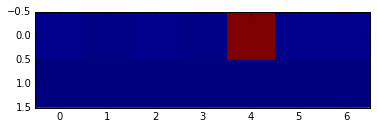

[[  2.24593212e-03  -8.81240475e-04   2.57255317e-03   1.66325309e-03
   -1.88032423e-01   2.57234249e-03   2.62793052e-03]
 [ -4.84465550e-04  -0.00000000e+00  -0.00000000e+00  -4.60556284e-04
   -5.85207310e-05  -0.00000000e+00  -0.00000000e+00]]


In [15]:

plt.imshow(np.abs(prueba._U), interpolation='none')
plt.show()
print prueba._U

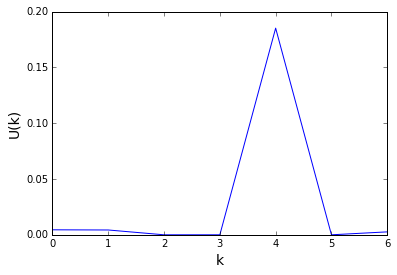

In [14]:
from classMVA import MVA
import numpy as np
import matplotlib.pyplot as plt


plt.plot(abs(prueba._U.T[:,0]))
plt.xlabel('k', fontsize=14)
plt.ylabel('U(k)', fontsize=14)


plt.show()

In [19]:
##FUNCION OBJETIVO con los datos
for i in range(10):
    prueba = MVA('PCA','l1','None',1e-5,i+1,0.01,1e-3,100)
    prueba.fit(RDD_PCA)
    W=prueba._W
    U=prueba._U
    #mse=RDD_PCA.map(lambda x: np.mean(np.array(x - np.dot(W,np.dot(x, U.T)))**2)).mean()
    print mse 
    
#print prueba._U
#print prueba._W

(1, 10)
(10, 10)
(10, 10)
Extracting projection vector 0 out of 1
(1, 10)
(10, 10)
(10, 10)
Extracting projection vector 0 out of 1
Frobenius norm error: 0.00040001193935
(1, 10)
(10, 10)
(10, 10)
Extracting projection vector 0 out of 1
Frobenius norm error: 0.000203905232433
(1, 10)
(10, 10)
(10, 10)
Extracting projection vector 0 out of 1
Frobenius norm error: 0.000360207781747
(1, 10)
(10, 10)
(10, 10)
Extracting projection vector 0 out of 1
Frobenius norm error: 0.000590234829677
(1, 10)
(10, 10)
(10, 10)
Extracting projection vector 0 out of 1
Frobenius norm error: 0.000750278521701
(1, 10)
(10, 10)
(10, 10)
Extracting projection vector 0 out of 1
Frobenius norm error: 0.00128397904579
(1, 10)
(10, 10)
(10, 10)
Extracting projection vector 0 out of 1
Frobenius norm error: 0.000561593663504
(1, 10)
(10, 10)
(10, 10)
Extracting projection vector 0 out of 1
Frobenius norm error: 0.000315757400354
(1, 10)
(10, 10)
(10, 10)
Extracting projection vector 0 out of 1
Frobenius norm error: 

LinAlgError: SVD did not converge

In [9]:
W=prueba._W
U=prueba._U
mse=RDD_PCA.map(lambda x: np.mean(np.array(x - np.dot(W,np.dot(x, U.T)))**2)).mean()
print mse 


0.425506156911
